In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
!ls -R data/mini_data/data

track_features training_set

data/mini_data/data/track_features:
tf_mini.csv

data/mini_data/data/training_set:
log_mini.csv


In [3]:
path_track_features = "data/mini_data/data/track_features/tf_mini.csv"
path_training_set = "data/mini_data/data/training_set/log_mini.csv"

In [4]:
track_features = pd.read_csv(path_track_features)
training_set = pd.read_csv(path_training_set)

#### Clean Up the `track_features` Data...

In [5]:
track_features.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [6]:
track_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
track_id                  50704 non-null object
duration                  50704 non-null float64
release_year              50704 non-null int64
us_popularity_estimate    50704 non-null float64
acousticness              50704 non-null float64
beat_strength             50704 non-null float64
bounciness                50704 non-null float64
danceability              50704 non-null float64
dyn_range_mean            50704 non-null float64
energy                    50704 non-null float64
flatness                  50704 non-null float64
instrumentalness          50704 non-null float64
key                       50704 non-null int64
liveness                  50704 non-null float64
loudness                  50704 non-null float64
mechanism                 50704 non-null float64
mode                      50704 non-null object
organism                  50704 non-null float64
speechiness    

In [8]:
track_features[[c for c in track_features.columns if track_features[c].dtype != 'float64']].head()

,track_id,release_year,key,mode,time_signature
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,1950,0,major,4
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,1950,0,major,3
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,1951,0,minor,4
3,t_070a63a0-744a-434e-9913-a97b02926a29,1951,0,major,4
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,1951,0,major,4


Examine `release_year`

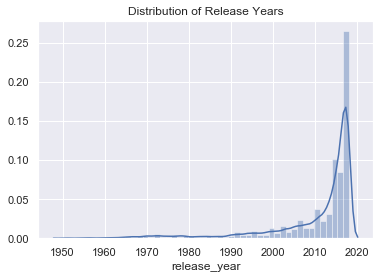

In [11]:
sns.distplot(track_features.release_year)
plt.title("Distribution of Release Years");

Examine `key`

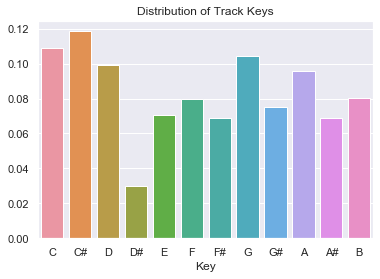

In [41]:
# Key-mappings are from the dataset docs
# https://en.wikipedia.org/wiki/Pitch_class
keys = track_features.key.value_counts().sort_index()
sns.barplot(
    x=[
        "C",
        "C#",
        "D",
        "D#",
        "E",
        "F",
        "F#",
        "G",
        "G#",
        "A",
        "A#",
        "B"
    ],
    y=keys.values/keys.sum()
)
plt.title("Distribution of Track Keys")
plt.xlabel("Key");

Examine `mode`

In [37]:
track_features['mode'].value_counts()

major    32555
minor    18149
Name: mode, dtype: int64

In [38]:
track_features['mode'].value_counts() / track_features['mode'].count()

major    0.64206
minor    0.35794
Name: mode, dtype: float64

Examine `time_signatures`

In [49]:
tf = track_features.time_signature.value_counts().sort_index()
tf / tf.sum()

0    0.000552
1    0.008145
3    0.076858
4    0.897779
5    0.016665
Name: time_signature, dtype: float64

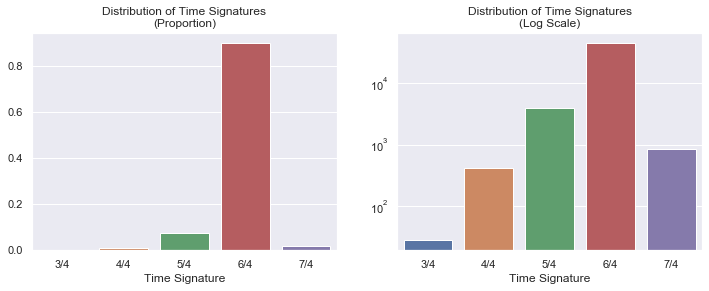

In [56]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(
    [f"{i}/4" for i in range(3,8)],
    tf.values / tf.sum()
)
plt.title("Distribution of Time Signatures\n(Proportion)")
plt.xlabel("Time Signature")

plt.subplot(1,2,2)
sns.barplot(
    [f"{i}/4" for i in range(3,8)],
    tf.values
)
plt.title("Distribution of Time Signatures\n(Log Scale)")
plt.xlabel("Time Signature")
plt.yscale('log');

The only feature that seems like it needs to be changed is the `mode`, since it's currently a string and could just as easily be an integer flag.

In [60]:
track_features['mode'] = (track_features['mode'] == 'major').astype('int32')

***

Now that we've cleaned up the track features, we can do the same for the other dataset.